In [1]:
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpg_df = pd.read_csv('auto-mpg.csv')

In [3]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
mpg_df[mpg_df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [6]:
mpg_df=mpg_df.replace('?',np.nan)

In [7]:
mpg_df=mpg_df.drop('car name',axis=1)

In [8]:
mpg_df['horsepower']=mpg_df['horsepower'].astype ('float64')

In [9]:
mpg_df=mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [10]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


<Figure size 640x480 with 0 Axes>

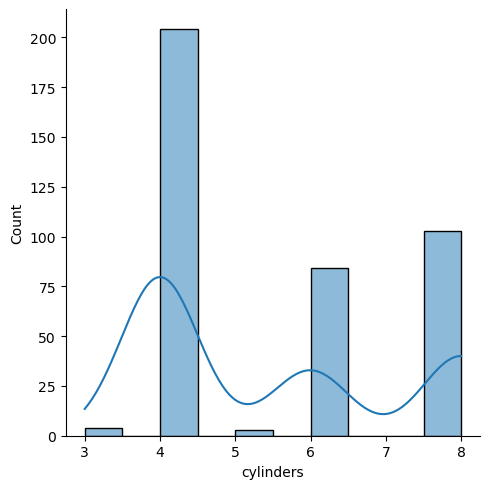

<Figure size 640x480 with 0 Axes>

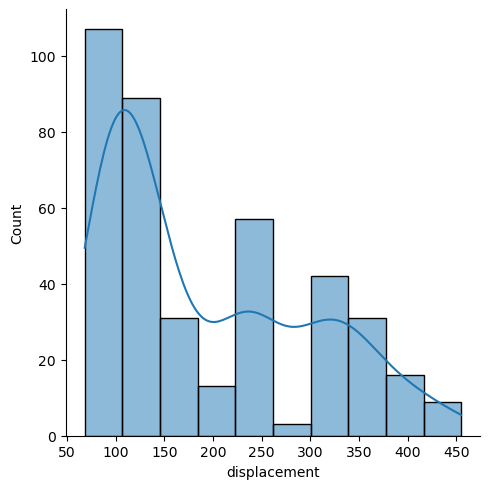

<Figure size 640x480 with 0 Axes>

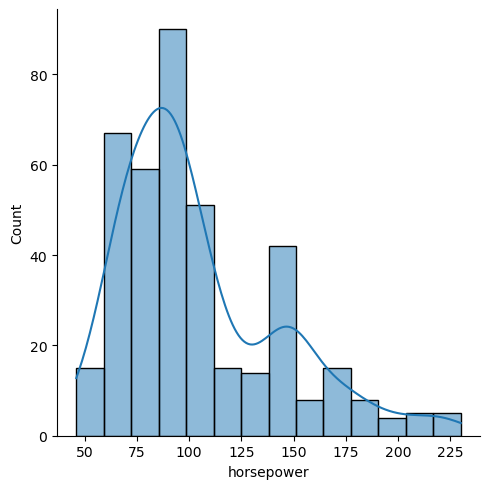

<Figure size 640x480 with 0 Axes>

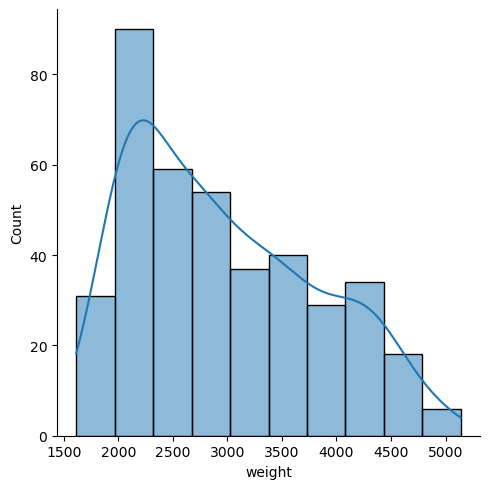

<Figure size 640x480 with 0 Axes>

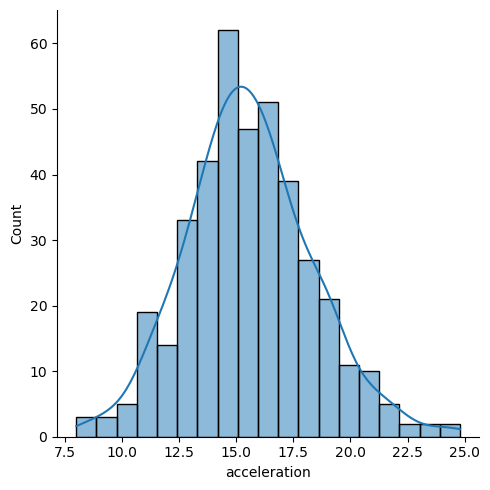

<Figure size 640x480 with 0 Axes>

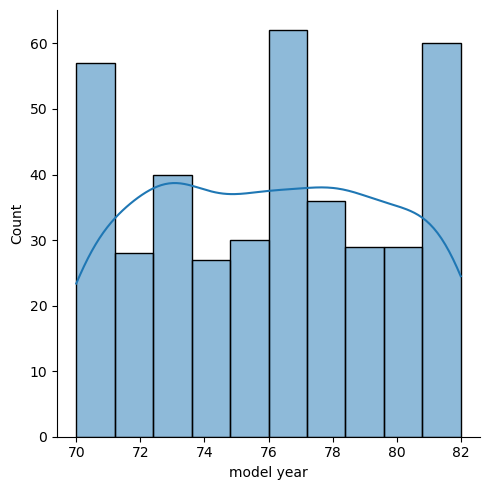

In [11]:
a=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
for i in a:
    plt.figure()
    sns.displot(mpg_df[i],kde=True)
    plt.show()

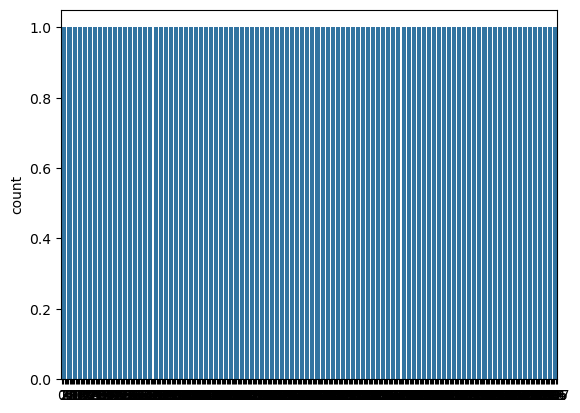

In [12]:
a=['origin']
for i in a:
    plt.figure()
    sns.countplot(mpg_df[i])
    plt.show()

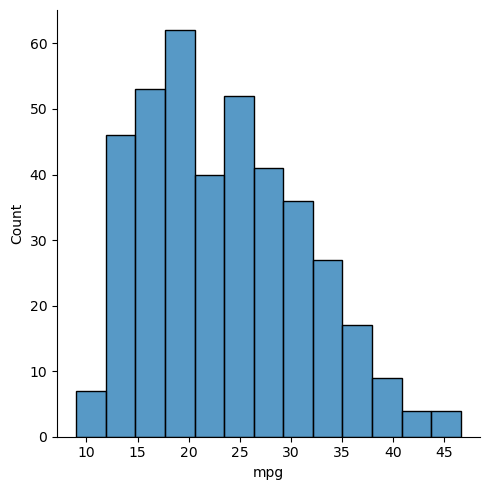

In [13]:
sns.displot(mpg_df['mpg'])
plt.show()

In [14]:
x=mpg_df.iloc[:,1:]
x=pd.DataFrame(x)
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [15]:
y=mpg_df.iloc[:,0]
y=pd.DataFrame(y)
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [16]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns) 
y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.30, random_state=1)

In [18]:
x_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,-0.715145
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.533222
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.533222
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-0.715145
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,1.781589
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,-0.715145
255,-0.856321,-0.513026,-0.427091,-0.296088,-0.061030,0.538847,-0.715145
72,1.498191,1.061796,1.197027,1.089620,-1.113959,-1.085858,-0.715145
235,-0.856321,-0.925936,-0.767632,-0.834055,0.955591,0.268063,1.781589


In [19]:
list(enumerate(x_train.columns))

[(0, 'cylinders'),
 (1, 'displacement'),
 (2, 'horsepower'),
 (3, 'weight'),
 (4, 'acceleration'),
 (5, 'model year'),
 (6, 'origin')]

In [20]:
regression_model.coef_

NameError: name 'regression_model' is not defined

In [21]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)


for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.08561436895562727
The coefficient for displacement is 0.30441822535930224
The coefficient for horsepower is -0.09718466302484148
The coefficient for weight is -0.7628632829136762
The coefficient for acceleration is 0.021591275172924692
The coefficient for model year is 0.37494080741187147
The coefficient for origin is 0.12302637024556869


In [22]:
regression_model.intercept_

array([0.01283313])

In [23]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.012833128293992926


In [24]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)

Ridge(alpha=0.3)

In [25]:
list(enumerate(x_train.columns))

[(0, 'cylinders'),
 (1, 'displacement'),
 (2, 'horsepower'),
 (3, 'weight'),
 (4, 'acceleration'),
 (5, 'model year'),
 (6, 'origin')]

In [26]:
ridge.coef_

array([-0.08073002,  0.28822207, -0.09985675, -0.75105509,  0.0191277 ,
        0.37378312,  0.12212717])

In [27]:
for i,col in enumerate(x_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[i]))

Ridge model coefficients for cylinders is -0.08073001909555812:
Ridge model coefficients for displacement is 0.2882220741723119:
Ridge model coefficients for horsepower is -0.09985675156606097:
Ridge model coefficients for weight is -0.7510550916024473:
Ridge model coefficients for acceleration is 0.019127698314832502:
Ridge model coefficients for model year is 0.3737831248958427:
Ridge model coefficients for origin is 0.12212717285800233:


In [28]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001)

In [34]:
for i,col in enumerate(x_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for cylinders is -0.060728139180575416:
Lasso model coefficients for displacement is 0.2530745201538069:
Lasso model coefficients for horsepower is -0.09380542240109566:
Lasso model coefficients for weight is -0.7449273203439102:
Lasso model coefficients for acceleration is 0.017180631479466173:
Lasso model coefficients for model year is 0.3730397067092029:
Lasso model coefficients for origin is 0.1176486076478358:


In [35]:
print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))

0.8081802739111359
0.8472274567567306


In [36]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.8081651504849107
0.8475401122140553


In [37]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.8080729441379447
0.8475870843519678


In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [41]:
x_poly = poly.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.30, random_state=1)
x_train.shape

(278, 29)

In [43]:
regression_model.fit(x_train, y_train)
print(regression_model.coef_[0])

[ 1.83413475e-13  6.50937571e-01 -2.17855687e-01 -2.45601437e+00
 -4.81187049e+00 -6.44775739e-01  2.85471189e+00  1.03974036e+00
 -4.73859713e-01 -6.74188889e-01  1.43519865e+00  1.13264258e+00
 -1.54521285e+00  9.04315573e-01 -1.42332439e-01  1.31740727e+00
 -1.25529739e+00  3.45224055e+00  1.32798427e+00  2.56954964e-01
 -9.14623227e-01 -1.37168588e+00  8.80133118e-01  6.59590958e-01
 -6.92229746e-01 -1.01303860e+00  5.50296551e-01  1.24973189e+00
  9.07830046e-01]


In [45]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.          0.64813084 -0.36554878 -2.46919357 -4.70667241 -0.63510083
  2.8499319   0.96173248 -0.49248204 -0.57492325  1.37951065  1.0927984
 -1.42036657  0.89110432 -0.16927823  1.35119104 -1.1349459   3.21038276
  1.16514278  0.22836119 -0.89663938 -1.35284633  0.79573939  0.58576253
 -0.61776911 -0.88637153  0.54014514  1.23036832  0.88256903]


In [47]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.8924614223751737
0.8615025469455593


In [49]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.2994648  -0.08787231 -2.43642026 -4.7023043  -0.41557099
  2.82883219  0.79630585 -0.63845609 -0.19106524  1.35870323  0.71048483
 -0.95232354  0.80157019 -0.          1.30713909 -0.22245995  2.23244448
  0.41856317  0.         -0.68238432 -1.20299711  0.33414503  0.06086321
 -0.38005578 -0.07856802  0.52335532  1.11608276  0.72523195]


In [50]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.8910435407965047
0.8679233223131171
